# Loan Data from Prosper: Communicate Data Findings
## by Nkemakolam Onyemachi



## Investigation Preview

> In this analysis, I wanted to investigate the relationships with the loan applications and the Borrowers' APR. 
> Also with the investors. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's
> stated monthly income, Employment Status , Term and Occupation.

## Dataset Overview
> The dataset contains 83982 loans with 21 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome,
> ProsperRating (Alpha), EmploymentStatus and many others)




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Import the cleaned prosper loan

In [2]:
# load in the previous saved dataset into a pandas dataframe
df_loan = pd.read_csv('ProsperLoan_cleaned.csv')

# Distribution of loans annually
* 2013 had the highest loan application

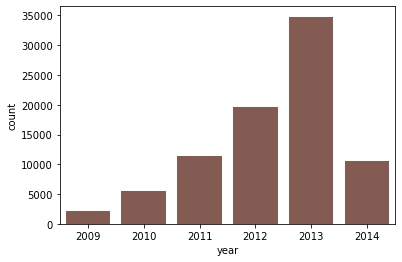

In [3]:
default_color = sns.color_palette()[5]
sns.countplot(data = df_loan, x = 'year', color = default_color);
plt.show()

# Distribution of Borrower APR
* The borrower APR's peak is multimodal with largest peak from 0.30-0.37 while the smallest peak is from 0.0-0.1 and 0.4

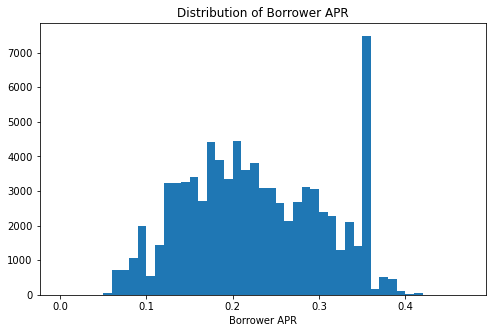

In [4]:
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

# Distribution of loan original amount

* Highest loan amount is between 1k to  5k while the lowest loan amount is 30k

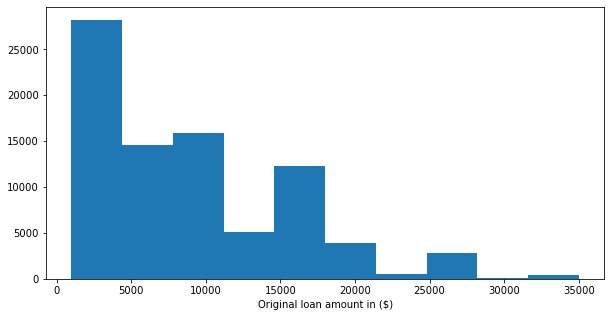

In [5]:
plt.figure(figsize=[10, 5])
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount in ($)');

# Borrower APR vs. Loan Amount
The APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount

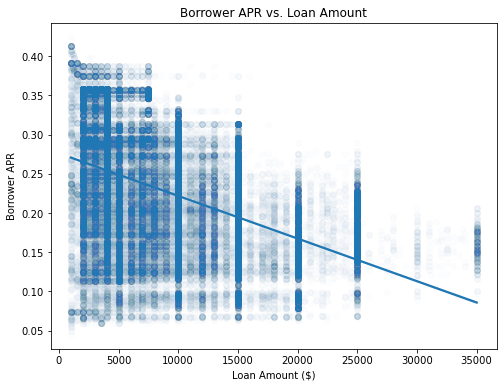

In [6]:
plt.figure(figsize = [8, 6])
sns.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

# Borrower's APR vs Prosper rating
* HR had the highest APR while AA had the lowest APR

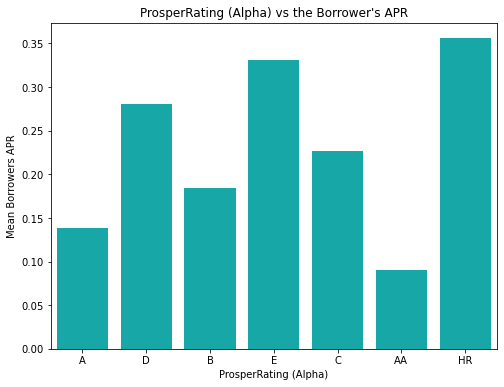

In [7]:
fig = plt.figure(figsize = [8,6])
color = sns.color_palette()[7]
sns.barplot(data = df_loan, x = 'ProsperRating (Alpha)',y='BorrowerAPR',color='c',ci=None)
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Mean Borrowers APR')
plt.title("ProsperRating (Alpha) vs the Borrower's APR")

plt.show()

## Prosper ratings of Applicants
* The highetst number of loan applicant had C ratings while the least number had AA rating.

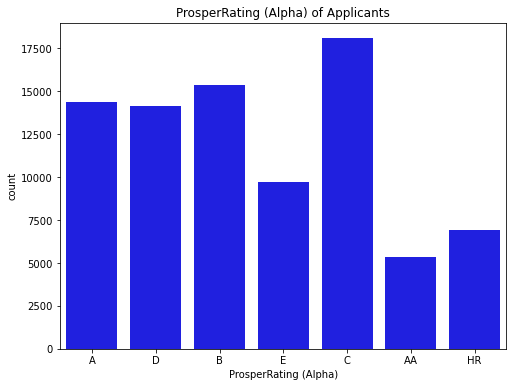

In [8]:
fig = plt.figure(figsize = [8,6])
color = sns.color_palette()[7]
sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)',color='b')
plt.xlabel('ProsperRating (Alpha)')
plt.title('ProsperRating (Alpha) of Applicants')

plt.show()

# Borrower APR vs Occupation
* The borrower APR changes with the occupation,Interestingly with student in technical schools having least 
and college sophomores having highest average rating.

<Figure size 1440x576 with 0 Axes>

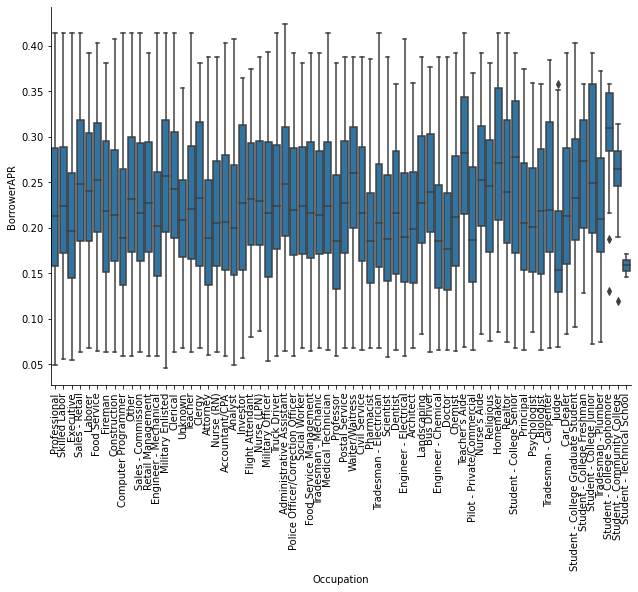

In [9]:
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 8])
g = sns.PairGrid(data = df_loan, y_vars = ['BorrowerAPR'], 
                x_vars = ['Occupation'] , height = 6, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);
plt.show()

# Prosper Rating Effect on Relationship between APR and Loan Amount
* The graph is negative correlated  in the 'HR' category to the loan amount and tends to positve when it reaches the 'A' category and the 'AA' category.
The 'A' and 'AA' category has the lowest risk. It will be profitable to encourage them in this category to borrow more to get more profit.

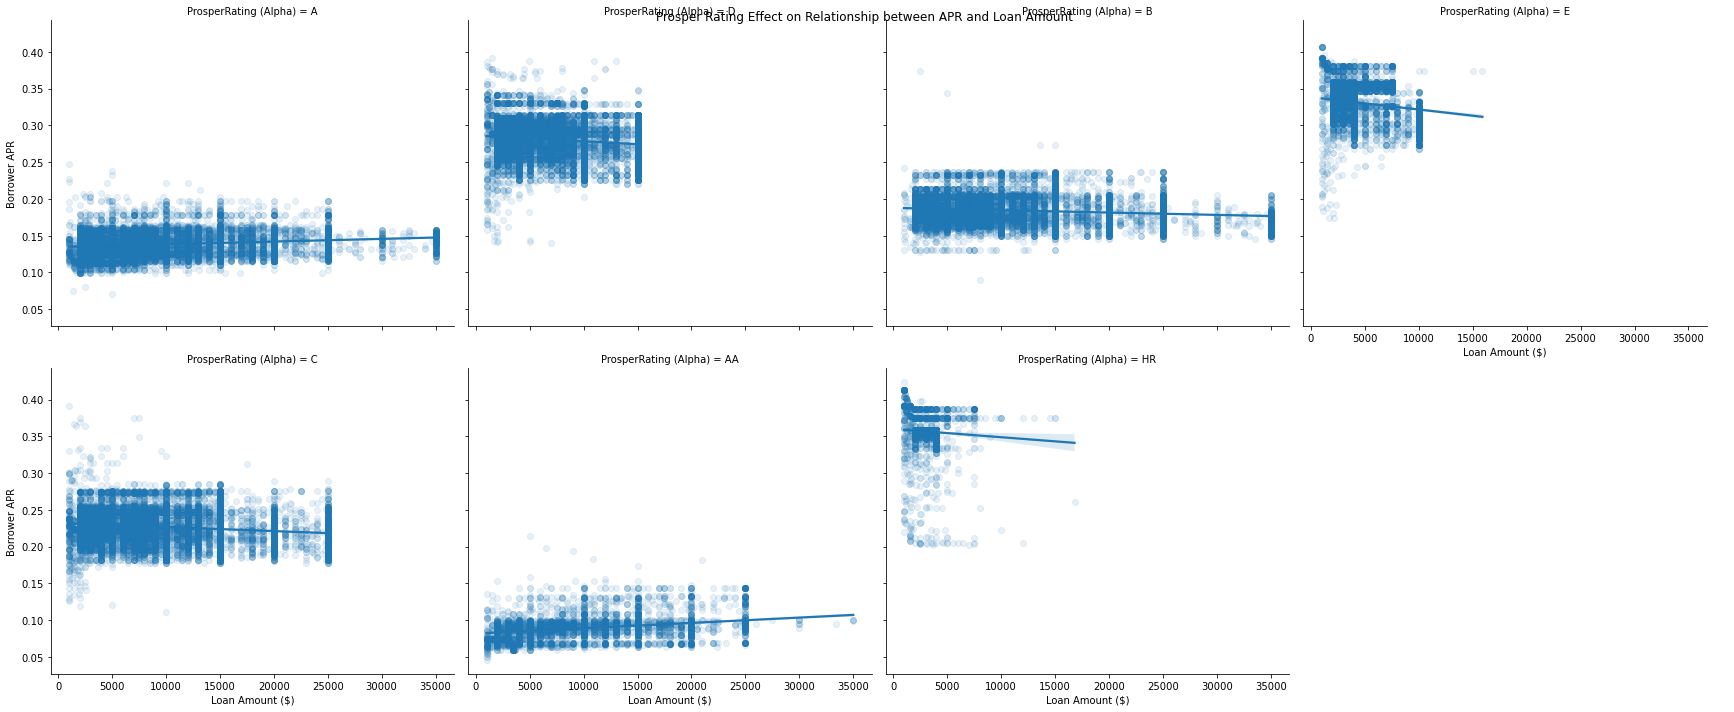

In [10]:
g=sns.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount');

# StatedMonthlyIncome and LoanOriginalAmount by Rating and Term
* StatedMonthlyIncome and LoanOriginalAmount change with the increase in the borrow term and ratings on an average

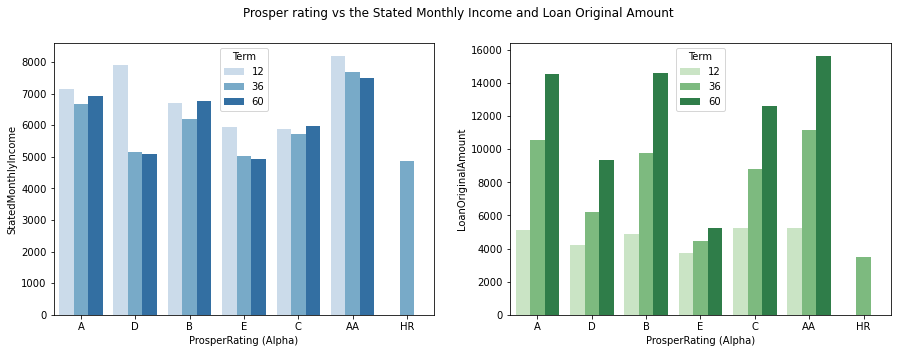

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=[15,5])
sns.barplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term', ci=None,
           palette = 'Blues',   ax=ax[0])
sns.barplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',ci=None,
           palette = 'Greens',ax=ax[1]);
plt.suptitle('Prosper rating vs the Stated Monthly Income and Loan Original Amount');
plt.show()

# Investors and the type of loans
* Investors like to invest in loan applicants who want to borrow money for business purposes. 
The highest number of applicants borrow for Debt consolidation

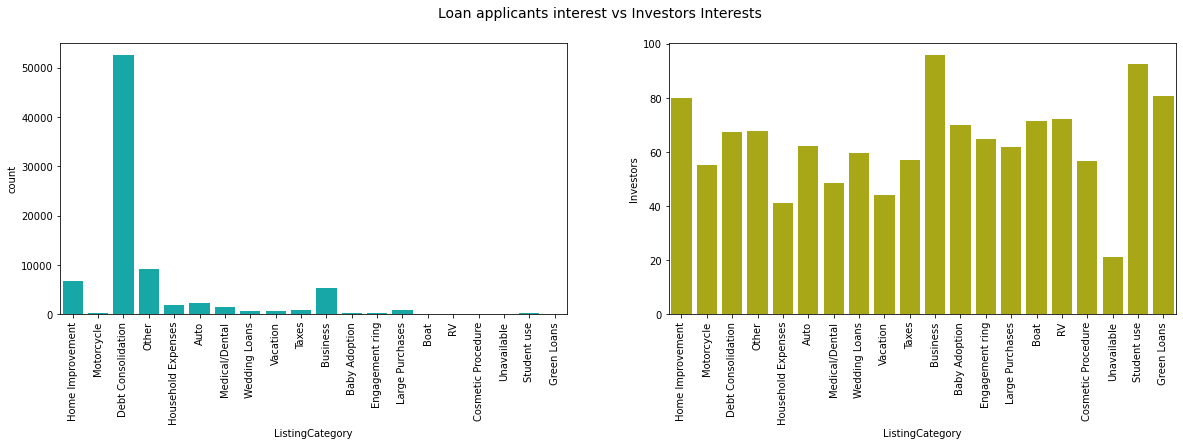

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=[20,5])
sns.countplot(data = df_loan, x = 'ListingCategory', color = 'c',ax=ax[0])
ax[0].tick_params(axis='x', labelrotation=90)
sns.barplot(data=df_loan, x='ListingCategory', y="Investors",  ci=None,color='y',ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=90)
plt.xlabel('ListingCategory')
plt.suptitle('Loan applicants interest vs Investors Interests', fontsize=14)

plt.show()

# Investor and Prosper rating
* The number of investors increases as the prosper rating gets better. 
The highest mean of investors in the Loan term was in 60months and in the "AA" category.

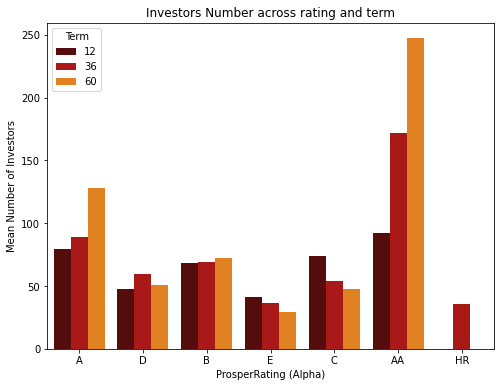

In [13]:
fig = plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'Investors', hue = 'Term',
           palette = 'gist_heat', ci=None)
plt.title('Investors Number across rating and term')
plt.ylabel('Mean Number of Investors')
ax.set_yticklabels([],minor = True);